In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

#os.chdir("drive/MyDrive/Project")
print(os.getcwd())
print(os.listdir())

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Any results you write to the current directory are saved as output.

/content
['.config', 'drive', 'sample_data']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
lines=pd.read_csv("/content/drive/MyDrive/Project/Cleaned-English-HindiDataSet - Sheet1.csv",encoding='utf-8')

In [ ]:
lines['source'].value_counts()

tides                                                                                                                                                                                                                                                    24819
ted                                                                                                                                                                                                                                                      19676
indic2012                                                                                                                                                                                                                                                17563
चूंकि उसका क्रमिक विकास का सिद्धांत गुणसूत्रीय सि+3144:3144द्धांत से असंगत था , उसने आनुवंशिकता की नयी व्याख़्या कुछ इस प्रकार की- “ पूर्व पीढ़ियों में Zजिन परिवेशी परिवर्तनों को आत्मसात किया गया है उन परिवर्तनों का अंतिम परिणाम आनुवंश

In [ ]:
lines=lines[lines['source']=='ted']

In [ ]:
lines.head(20)

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,ted,So there is some sort of justice,तो वहाँ न्याय है
23,ted,This changed slowly,धीरे धीरे ये सब बदला
26,ted,were being produced.,उत्पन्न नहीं कि जाती थी.
30,ted,"And you can see, this LED is going to glow.","और जैसा आप देख रहे है, ये एल.ई.डी. जल उठेगी।"
32,ted,"to turn on the lights or to bring him a glass of water,","लाईट जलाने के लिए या उनके लिए पानी लाने के लिए,"
35,ted,Can you imagine saying that?,क्या आप ये कल्पना कर सकते है


In [ ]:
pd.isnull(lines).sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
lines=lines[~pd.isnull(lines['english_sentence'])]

In [ ]:
lines.drop_duplicates(inplace=True)

In [ ]:
 lines=lines.sample(n=19500,random_state=30)
 lines.shape

(19500, 3)

In [ ]:
# Lowercase all characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.lower())
# lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.lower())

In [ ]:
# Remove quotes
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub("'", '', x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

In [ ]:
exclude = set(string.punctuation) # Set of all special characters
# # Remove all the special characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
# # Remove all numbers from text
# remove_digits = str.maketrans('', '', digits)
# lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.translate(remove_digits))
# lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.translate(remove_digits))

# lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

# # Remove extra spaces
# lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.strip())
# lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.strip())
# lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
# lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
# Add start and end tokens to target sequences
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x : 'START_ '+ x + ' _END')

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence
24554,ted,everything was done by the people to the people,START_ सब कुछ लोगों के द्वारा लोगों के लिए किया जा रहा था _END
35554,ted,that theres a new wave on the continent,START_ कि इस महाद्वीप पर एक नई लहर है। _END
12049,ted,so basically metabolism which is defined as,START_ तो बुनियादी तौर पे चयापचय जिसकी परिभाशा है _END
22466,ted,the g8 summit proposes that the solution to africas problems,START_ जी8 शिखर सम्मेलन ने प्रस्ताव दिया है कि अफ़्रीका की समस्याओं का समाधान _END
18151,ted,we could put polio fatigue,START_ तभी हम पोलियोसेथकान को _END


In [ ]:
### Get English and Hindi Vocabulary

def vocabCreator(sentence):
  all_eng_words= {'PAD':0}
  count = 1
  for eng in sentence:
      for word in eng.split():
          if word not in all_eng_words.keys():
              all_eng_words.update({word:count})
              count += 1
  return all_eng_words

all_eng_vocab = vocabCreator(lines['english_sentence'])
all_hin_vocab = vocabCreator(lines['hindi_sentence'])

In [ ]:
print(len(all_eng_vocab))
print(len(all_hin_vocab))

12473
15271


In [ ]:
print(all_eng_vocab)

print(all_hin_vocab)


{'PAD': 0, 'everything': 1, 'was': 2, 'done': 3, 'by': 4, 'the': 5, 'people': 6, 'to': 7, 'that': 8, 'theres': 9, 'a': 10, 'new': 11, 'wave': 12, 'on': 13, 'continent': 14, 'so': 15, 'basically': 16, 'metabolism': 17, 'which': 18, 'is': 19, 'defined': 20, 'as': 21, 'g8': 22, 'summit': 23, 'proposes': 24, 'solution': 25, 'africas': 26, 'problems': 27, 'we': 28, 'could': 29, 'put': 30, 'polio': 31, 'fatigue': 32, 'and': 33, 'mountains': 34, 'oceans': 35, 'also': 36, 'instructions': 37, 'how': 38, 'use': 39, 'gas': 40, 'brake': 41, 'pedal': 42, 'but': 43, 'its': 44, 'imperative': 45, 'listen': 46, 'idiosyncrasies': 47, 'of': 48, 'individuals': 49, 'can': 50, 'do': 51, 'many': 52, 'different': 53, 'types': 54, 'motion': 55, 'looked': 56, 'at': 57, 'are': 58, 'solving': 59, 'problem': 60, 'i': 61, 'know': 62, 'intimately': 63, 'skin': 64, 'you': 65, 'hitting': 66, 'story': 67, 'doesnt': 68, 'work': 69, 'if': 70, 'tell': 71, 'about': 72, 'her': 73, 'before': 74, 'urban': 75, 'retrofitting': 

In [ ]:
voc = all_eng_vocab
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["this", "is", "a", "testing", "part"]
[word_index[w] for w in test]

[117, 19, 10, 5823, 183]

In [ ]:
hindi_voc = all_hin_vocab
hindi_word_index = dict(zip(hindi_voc, range(len(hindi_voc))))

In [ ]:
hindi_test =["यह", "एक", "हिंदी", "वाक्य", "है"]
[hindi_word_index[w] for w in hindi_test]

[55, 17, 13604, 2955, 28]

In [ ]:
lines['length_eng_sentence']=lines['english_sentence'].apply(lambda x:len(x.split(" ")))
lines['length_hin_sentence']=lines['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
24554,ted,everything was done by the people to the people,START_ सब कुछ लोगों के द्वारा लोगों के लिए किया जा रहा था _END,9,15
35554,ted,that theres a new wave on the continent,START_ कि इस महाद्वीप पर एक नई लहर है। _END,8,10
12049,ted,so basically metabolism which is defined as,START_ तो बुनियादी तौर पे चयापचय जिसकी परिभाशा है _END,7,10
22466,ted,the g8 summit proposes that the solution to africas problems,START_ जी8 शिखर सम्मेलन ने प्रस्ताव दिया है कि अफ़्रीका की समस्याओं का समाधान _END,10,15
18151,ted,we could put polio fatigue,START_ तभी हम पोलियोसेथकान को _END,5,6


In [ ]:
lines=lines[lines['length_eng_sentence']<=20]
lines=lines[lines['length_hin_sentence']<=20]

In [ ]:
lines.shape

(19311, 5)

In [ ]:
print("maximum length of Hindi Sentence ",max(lines['length_hin_sentence']))
print("maximum length of English Sentence ",max(lines['length_eng_sentence']))

maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [ ]:
print("minimum length of Hindi Sentence ",min(lines['length_hin_sentence']))
print("minimum length of english Sentence ",min(lines['length_eng_sentence']))

minimum length of Hindi Sentence  3
minimum length of english Sentence  1


In [ ]:
max_length_src=max(lines['length_hin_sentence'])
max_length_tar=max(lines['length_eng_sentence'])

In [ ]:
# input_words = sorted(list(all_eng_words))
# target_words = sorted(list(all_hindi_words))

# num_encoder_tokens = len(input_words)
# num_decoder_tokens = len(target_words)
# num_encoder_tokens, num_decoder_tokens

num_encoder_tokens, num_decoder_tokens = len(all_eng_vocab), len(all_hin_vocab)

In [ ]:
# num_decoder_tokens += 1 #for zero padding

In [ ]:
# input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
# target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [ ]:
# reverse_input_token_index = dict((i, word) for word, i in input_token_index.items())
# reverse_target_token_index = dict((i, word) for word, i in target_token_index.items())

reverse_input_token_index = {v:k for k, v in all_eng_vocab.items()}
reverse_target_token_index = {v:k for k, v in all_hin_vocab.items()}

In [ ]:
lines = shuffle(lines)
lines.head(10)

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
55892,ted,it becomes kiteshaped,START_ ये पतंग जैसा लगने लगता है। _END,3,8
28390,ted,and youll suddenly discover what it would be like,START_ और तभी अचानक आप पाएंगे कि ऐसा हो जाएगा _END,9,11
22917,ted,in which he reached out to the muslim world,START_ जिन में उन्होंने मुस्लिम दुनिया से जुडना चाहा है _END,10,12
42002,ted,it fits into the environment it is the environment,START_ यह वातावरण में फिट बैठता है यह खुद वातावरण है _END,9,12
33903,ted,where people started looking at it as a platform,START_ जब लोगों ने इसे एक मंच के रूप में देखना शुरू किया _END,9,14
14807,ted,but i must say,START_ लेकिन मैं बताऊंगा _END,4,5
49205,ted,this was his own assembly of heroes,START_ यह उसके पसंदीदा बहादुर नायकों की फ़ौज थी _END,7,10
38482,ted,for what defines humanity perhaps biologically,START_ जो इंसानियत को पारिभाषित करता है शायद शारीरिक रूप से _END,6,12
24599,ted,to deliver the “crunch year”,START_ वितरित करने के लिए “मुश्किल वर्ष में” _END,5,9
26128,ted,that the way to deal with copyright violation,START_ कि कॉपीराइट हनन से निपटने का सही उपाय वो है जो कि _END,8,14


In [ ]:
X, y = lines['english_sentence'], lines['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape
#print(X_train)
#print(X_test)


((15448,), (3863,))

In [ ]:
import gensim

All ready processed

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-05-21 10:14:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-21 10:14:47--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-21 10:14:47--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

All ready processed


In [ ]:
!unzip -q glove.6B.zip

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Project/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(all_eng_vocab) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in all_eng_vocab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        #print(embedding_matrix[i])
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 11266 words (1207 misses)


In [ ]:
print(embeddings_index["will"])

[-0.26703   0.44911   0.55478  -0.69003   0.046175 -0.43044  -0.29348
  1.0149   -0.33757  -0.096388 -0.28176   0.41828   0.58357  -0.078788
 -0.23511  -0.74174   0.68242   0.77152  -0.80698   0.13537   0.19157
 -0.51766   0.30764   0.68624   0.15603  -0.13725   0.064215 -0.25319
  0.33305  -0.61336  -0.60918   0.72316  -0.29642   0.34352   0.36234
  0.74162   0.30484   0.41837  -0.35164  -0.41675  -0.32865  -0.56729
 -0.11949  -0.70703  -0.20916   0.050621  0.057078 -0.56363   0.032941
 -1.1897    0.0467   -0.48235  -0.12548   1.088     0.095233 -2.5264
 -0.15569  -0.081787  1.9323    0.75413  -0.21121   0.7779   -0.41152
 -0.019988  0.83285   0.45991   0.19578   1.1235   -0.21463  -1.0439
  0.64653  -1.0831   -0.47316  -0.76509   0.22128  -0.38609  -0.24266
  0.28377  -0.8266   -0.022102  0.9439   -0.40069  -0.65322  -0.053926
 -1.6434   -0.57158   0.50725   0.24536   0.3272   -0.53953  -0.12521
  0.071234 -0.14235  -0.41365  -0.68288   0.22851   0.56056  -0.87247
  0.83828   0.465  

In [ ]:
print(embedding_matrix[533])

[-0.26703     0.44911     0.55478001 -0.69002998  0.046175   -0.43044001
 -0.29348001  1.01489997 -0.33757001 -0.096388   -0.28176001  0.41828001
  0.58357    -0.078788   -0.23511    -0.74173999  0.68242002  0.77152002
 -0.80698001  0.13537     0.19157    -0.51766002  0.30763999  0.68624002
  0.15603    -0.13725001  0.064215   -0.25319001  0.33305001 -0.61335999
 -0.60917997  0.72316003 -0.29642001  0.34351999  0.36234     0.74162
  0.30484     0.41837001 -0.35163999 -0.41675001 -0.32865    -0.56729001
 -0.11949    -0.70703    -0.20916     0.050621    0.057078   -0.56362998
  0.032941   -1.18970001  0.0467     -0.48234999 -0.12548     1.08800006
  0.095233   -2.52640009 -0.15569    -0.081787    1.93229997  0.75413001
 -0.21121     0.77789998 -0.41152    -0.019988    0.83284998  0.45991001
  0.19577999  1.12349999 -0.21462999 -1.04390001  0.64652997 -1.08309996
 -0.47316    -0.76508999  0.22127999 -0.38609001 -0.24266     0.28376999
 -0.82660002 -0.022102    0.94389999 -0.40068999 -0.65

In [ ]:
from tensorflow.keras.layers import Embedding


In [ ]:
import keras
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(lines), activation='softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1247500   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

In [ ]:

X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    # encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                    encoder_input_data[i, t] = all_eng_vocab[word]
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        # decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                        decoder_input_data[i, t] = all_hin_vocab[word]
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        # decoder_target_data[i, t - 1, target_token_index[word]] = 1.
                        decoder_target_data[i, t - 1, all_hin_vocab[word]] = 1.

            #print(encoder_input_data.shape)
            #print(decoder_input_data.shape)
            #print(decoder_target_data.shape)
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
latent_dim=300

In [ ]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = False)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = False)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 300)    3741900     ['input_2[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, None, 300)    4581300     ['input_3[0][0]']                
                                                                                            

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 100


Allready processed for 100 epocs scuessfully


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
120/120 [==============================] - 31s 179ms/step - loss: 3.1740 - acc: 0.0572 - val_loss: 3.1370 - val_acc: 0.0610
Epoch 2/100
120/120 [==============================] - 20s 168ms/step - loss: 3.0642 - acc: 0.0601 - val_loss: 3.1340 - val_acc: 0.0621
Epoch 3/100
120/120 [==============================] - 21s 173ms/step - loss: 3.0245 - acc: 0.0622 - val_loss: 3.1070 - val_acc: 0.0645
Epoch 4/100
120/120 [==============================] - 20s 168ms/step - loss: 2.9828 - acc: 0.0651 - val_loss: 3.0768 - val_acc: 0.0664
Epoch 5/100
120/120 [==============================] - 20s 168ms/step - loss: 2.9212 - acc: 0.0691 - val_loss: 3.0270 - val_acc: 0.0700
Epoch 6/100
120/120 [==============================] - 20s 168ms/step - loss: 2.8435 - acc: 0.0742 - val_loss: 2.9746 - val_acc: 0.0758
Epoch 7/100
120/120 [==============================] - 20s 163ms/step - loss: 2.7741 - acc: 0.0804 - val_loss: 2.9435 - val_acc: 0.0806
Epoch 8/100
120/120 [===========================

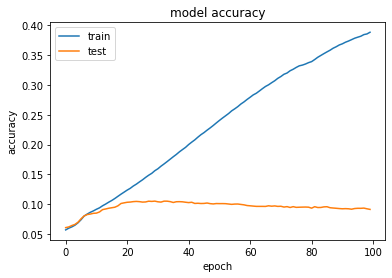

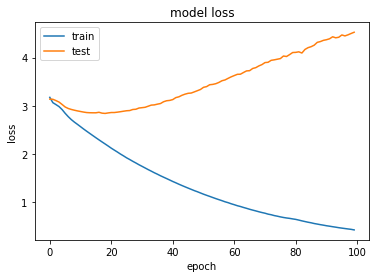

In [ ]:
history = model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('nmt_weights.h5')

In [ ]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    # target_seq[0, 0] = target_token_index['START_']
    target_seq[0, 0] = all_hin_vocab['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # sampled_char = reverse_target_char_index[sampled_token_index]
        sampled_char = reverse_target_token_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: when an image very similar to this
Actual Hindi Translation:  जब इससे बहुत मिलताझुलता एक चित्र 
Predicted Hindi Translation:  लेगारे लेगारे यान यान सुपरटास्कर लकवा सुने। बन
